# Example for Stochastic Gradient Descent

In [293]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap="Greys")

### Initialize a time series and some data points following a parabola + some noise

In [294]:
time = torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

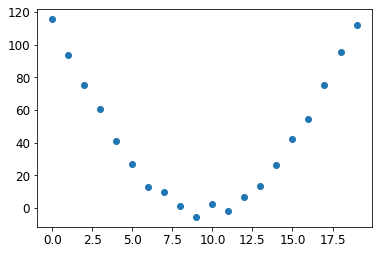

In [295]:
speed = torch.randn(20)*3 + 1.25*(time-9.5)**2 + 1
plt.scatter(time,speed)

### Define the model function

In [296]:
def f(t, params):
    a,b,c = params
    return a*(t**2)+ b*t + c

### Define the cost function

In [297]:
def mse(preds, targets):
    return ((preds-targets)**2).mean().sqrt()

### Step 1: Parameter initialization

In [298]:

torch.manual_seed(424242)
params = torch.randn(3).requires_grad_()
params.data = tensor([1.25, -20, 100])  # This shitty algorith gets stuck in shitty local minima unless the initial parameters are extremely close to the real ones
orig_params = params.clone()

### Step 2: Predictions

We calculate initial predictions and plot them

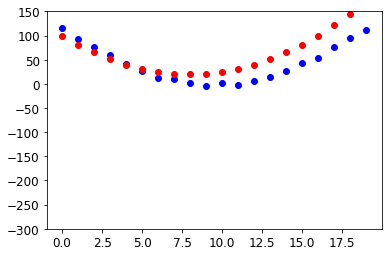

In [299]:
preds = f(time, params)

def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed, color="blue")
    ax.scatter(time, to_np(preds), color="red")
    ax.set_ylim(-300,150)

show_preds(preds)

### Step 3: Calculate the loss

In [300]:
loss = mse(preds, speed)
loss

tensor(31.0158, grad_fn=<SqrtBackward0>)

### Step 4: Calculate the gradient

In [301]:
loss.backward()
params.grad

tensor([161.9992,  10.6891,   0.6919])

### Step 5: Update the parameters

In [302]:
lr = 0.0001
params.data -= lr * params.grad.data
params.grad = None

In [303]:
preds = f(time, params)
mse(preds, speed)

tensor(28.3887, grad_fn=<SqrtBackward0>)

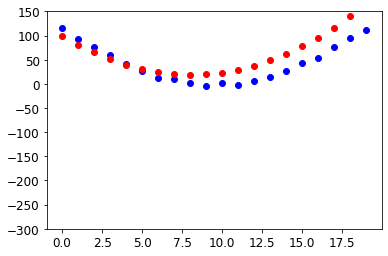

In [304]:
show_preds(preds)

Create a function to apply all these steps in one call

In [305]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

### Step 6: Repeat the process

In [306]:
for i in range(20):
    apply_step(params)

28.388700485229492
25.800840377807617
23.26414680480957
20.795433044433594
18.418617248535156
16.167884826660156
14.09151554107666
12.254216194152832
10.732098579406738
9.58959674835205
8.837958335876465
8.410701751708984
8.196881294250488
8.098708152770996
8.055702209472656
8.037239074707031
8.029358863830566
8.025964736938477
8.024462699890137
8.023757934570312


Visual representation of the training process:

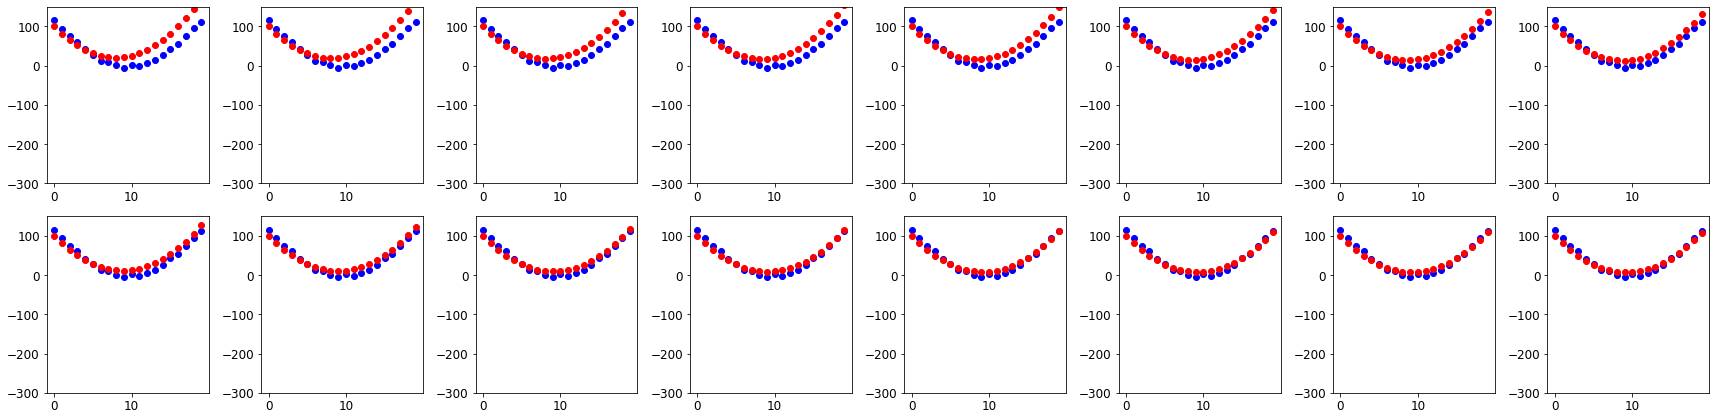

In [307]:
params = orig_params.detach().requires_grad_()
_,axs = plt.subplots(2,8,figsize=(24,6))
for ax in axs.flatten():
    show_preds(apply_step(params, False), ax)
plt.tight_layout()